In [7]:
import numpy as np


In [8]:
arr = np.arange(12, 38, 1)
print(arr)
arr = np.flip(arr)
print(arr)

[12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35
 36 37]
[37 36 35 34 33 32 31 30 29 28 27 26 25 24 23 22 21 20 19 18 17 16 15 14
 13 12]


In [9]:
arr = np.zeros((3, 3))
arr[0] = 1
arr[2] = 1 
arr[1, 0], arr[1, 2] = 1, 1
print(arr)
arr2 = np.zeros((5,5))
arr2[1:4, 1:4] = arr
print(arr2)

[[1. 1. 1.]
 [1. 0. 1.]
 [1. 1. 1.]]
[[0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 0.]
 [0. 1. 0. 1. 0.]
 [0. 1. 1. 1. 0.]
 [0. 0. 0. 0. 0.]]


In [10]:
arr1 = np.array([1,2,3,4])
arr2 = np.array(['Red','Green','White','Blue'])
arr3 = np.array([12.20,15,20,40])
dtype = np.dtype([('Ints', 'int64'), ('Colors', 'U10'), ('Floats', 'float64')])
arr = np.core.records.fromarrays([arr1, arr2, arr3], dtype=dtype)
print(arr)

[(1, 'Red', 12.2) (2, 'Green', 15. ) (3, 'White', 20. ) (4, 'Blue', 40. )]


In [11]:
arr = np.array([2, 7.9, 8, 1.5, 4, 14, 3.5, 1.45, 3.5, 6])
k = 5
kSmallest = np.argpartition(arr, k)
print(arr[kSmallest[:k]])

[3.5  2.   3.5  1.5  1.45]


In [12]:
arr = np.array( [ [2, 4, 6], [6, 8, 10], [12, 14, 16], [21, 34, 43] ] ) 
print("5th: ", arr.flat[4])
print("11th: ", arr.flat[10])

5th:  8
11th:  34


In [13]:
monthly_sales = np.array([[ 4134, 23925,  8657],
       [ 4116, 23875,  9142],
       [ 4673, 27197, 10645],
       [ 4580, 25637, 10456],
       [ 5109, 27995, 11299],
       [ 5011, 27419, 10625],
       [ 5245, 27305, 10630],
       [ 5270, 27760, 11550],
       [ 4680, 24988,  9762],
       [ 4913, 25802, 10456],
       [ 5312, 25405, 13401],
       [ 6630, 27797, 18403]])

# sum across row
monthly_industry_sales = np.sum(monthly_sales, axis=1)
avg_monthly_sales = np.mean(monthly_sales, axis=1)

# sum across column, each industry is summed across all months
cumulative_monthly_industry_sales = np.cumsum(monthly_sales, axis=0)

tax_collected = .05 * monthly_sales

print("Tax Collected:")
print(tax_collected)

# concatenate the 4th and 5th columns

monthly_sales = np.concatenate((monthly_sales, monthly_industry_sales.reshape(12,1), avg_monthly_sales.reshape(12,1)), axis=1)
print("5 columns monthly sales:")
print(monthly_sales)

# initial data
initialData = monthly_sales[:, 0:3]

monthly_industry_multipliers = np.array([[0.98, 1.02, 1.  ],
       [1.00, 1.01, 0.97],
       [1.06, 1.03, 0.98],
       [1.08, 1.01, 0.98],
       [1.08, 0.98, 0.98],
       [1.1 , 0.99, 0.99],
       [1.12, 1.01, 1.  ],
       [1.1 , 1.02, 1.  ],
       [1.11, 1.01, 1.01],
       [1.08, 0.99, 0.97],
       [1.09, 1.  , 1.02],
       [1.13, 1.03, 1.02]])

projected_monthly_sales = monthly_industry_multipliers * initialData
print("Projected monthly sales:")
print(projected_monthly_sales)



Tax Collected:
[[ 206.7  1196.25  432.85]
 [ 205.8  1193.75  457.1 ]
 [ 233.65 1359.85  532.25]
 [ 229.   1281.85  522.8 ]
 [ 255.45 1399.75  564.95]
 [ 250.55 1370.95  531.25]
 [ 262.25 1365.25  531.5 ]
 [ 263.5  1388.    577.5 ]
 [ 234.   1249.4   488.1 ]
 [ 245.65 1290.1   522.8 ]
 [ 265.6  1270.25  670.05]
 [ 331.5  1389.85  920.15]]
5 columns monthly sales:
[[ 4134.         23925.          8657.         36716.
  12238.66666667]
 [ 4116.         23875.          9142.         37133.
  12377.66666667]
 [ 4673.         27197.         10645.         42515.
  14171.66666667]
 [ 4580.         25637.         10456.         40673.
  13557.66666667]
 [ 5109.         27995.         11299.         44403.
  14801.        ]
 [ 5011.         27419.         10625.         43055.
  14351.66666667]
 [ 5245.         27305.         10630.         43180.
  14393.33333333]
 [ 5270.         27760.         11550.         44580.
  14860.        ]
 [ 4680.         24988.          9762.         39430.
  131

In [14]:
import h5py
filename = '/mnt/home/kxs997/Downloads/LIGO_data.hdf5'
data = h5py.File(filename, 'r')
print(type(data))

for key in data.keys():
    print(key)

<class 'h5py._hl.files.File'>
meta
quality
strain


Strain


Text(0, 0.5, 'Strain data')

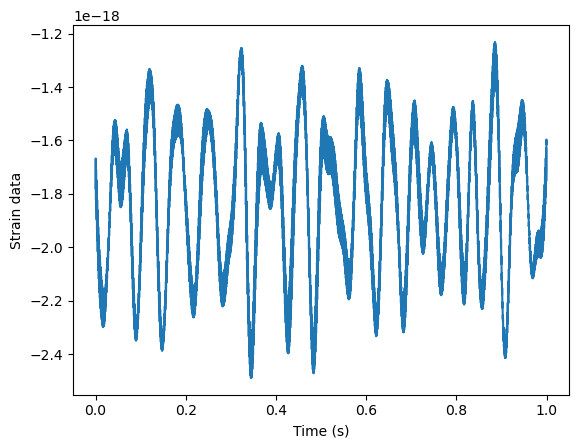

In [15]:
strain_group = data['strain']
for key in strain_group.keys():
    print(key)
    
strain_data = np.array(data['strain']['Strain'])
num_samples = 10000
timeVector = np.arange(0,1,1/num_samples)

import matplotlib.pyplot as plt

plt.plot(timeVector, strain_data[0:len(timeVector)])
plt.xlabel('Time (s)')
plt.ylabel('Strain data')


In [16]:
# Import the delayed function from Dask
import os
import pandas as pd
import dask
from dask import delayed

def top_10_most_popular(df):
    return df.nlargest(n=10, columns='popularity')

top_songs = []

path = '/mnt/home/kxs997/Downloads/spotify'
filenames = os.listdir(path)
filenames.remove("LICENSE.txt")

for file in filenames:
    file = path + '/' + file
    df = delayed(pd.read_csv)(file)
     # Find the top 10 most popular songs in this file
    df_top_10 = top_10_most_popular(df)
    top_songs.append(df_top_10)

# Compute the list of top 10s
top_songs_list = dask.compute(*top_songs)

# Concatenate them and find the best of the best
top_songs_df = pd.concat(top_songs_list)
df_all_time_top_10 = top_songs_df
print(df_all_time_top_10)

                          id              name  popularity  duration_ms  \
7617  2kS6td1yvmpNgZTt1q5pQq           Hayloft          86       181680   
7634  0zMAvsQmaQ4DGsmXtKixpn      Burning Pile          84       262173   
5148  1EzrEOXmMH3G43AXT1y7pA         I'm Yours          83       242187   
5535  49FYlytm3dAAraYgpoJZux          Umbrella          83       275987   
2858  4NOZ35Dhucr6UlVyLOtktd         Dangerous          82       246053   
...                      ...               ...         ...          ...   
1568  2tpWsVSb9UEmDRxAl1zhX1    Counting Stars          84       257267   
5651  0NlGoUyOJSuSHmngoibVAs        All I Want          84       305747   
9359  4nVBt6MZDDP6tRVdQTgxJg  Story of My Life          84       245493   
5823  3JvKfv6T31zO0ini8iNItO      Another Love          83       244360   
673   6Z8R6UsFuGXGtiIxiD8ISb    Safe And Sound          82       192790   

      explicit                         artists release_date  danceability key  \
7617         0    

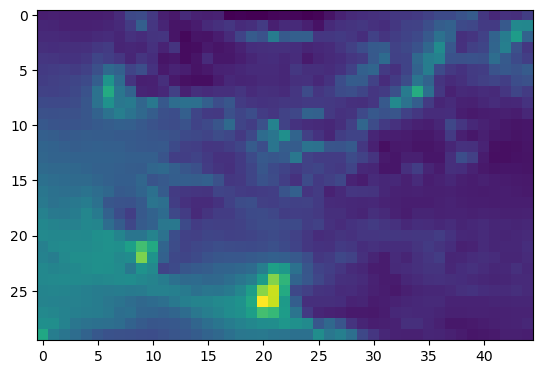

In [17]:
import dask.array as da

# Open the HDF5 dataset using h5py
hdf5_file = h5py.File('/mnt/home/kxs997/Downloads/era_eu.hdf5', 'r')

# Load the file into a Dask array with a reasonable chunk size
precip = da.from_array(hdf5_file['/precip'], chunks=(12, 15, 15))

# Select only the months of January
january_rainfalls = precip[0::12]

# Calculate the mean rainfall in January for each location
january_mean_rainfall = january_rainfalls.mean(axis=0)

plt.imshow(january_mean_rainfall.compute())
plt.show()

In [18]:
!pip install zarr

In [19]:

# Load the temperature data from the Zarr dataset
temps = da.from_zarr('/mnt/home/kxs997/Downloads/era_eu.zarr', component='temp')

# Print the Dask array of temperatures to see the chunk sizes
print(temps)

# Find the minimum of the mean monthly temperatures
all_time_low = temps.min()

# Compute the answer
all_time_low_value = all_time_low.compute()

print(all_time_low_value, "°C")

dask.array<from-zarr, shape=(504, 30, 45), dtype=float32, chunksize=(12, 15, 15), chunktype=numpy.ndarray>
-23.37648 °C


/mnt/home/kxs997/anaconda3/lib/python3.11/site-packages/xarray/backends/plugins.py:139: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


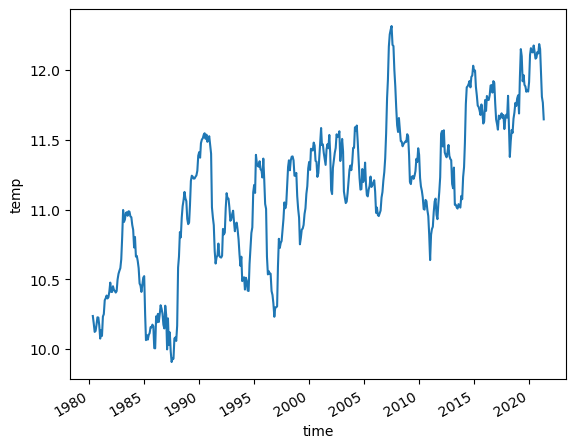

In [20]:
import xarray as xr

# Open the ERA5 dataset
ds = xr.open_dataset('/mnt/home/kxs997/Downloads/era_eu.zarr')

# Select the temperature dataset and take the latitude and longitude mean
temp_timeseries = ds['temp'].mean(dim=['lat', 'lon'])

# Calculate the 12 month rolling mean
temp_rolling_mean = temp_timeseries.rolling(time=12).mean()

# Plot the result
temp_rolling_mean.plot()
plt.show()

In [22]:
!pip install soundfile
import soundfile as sf

def load_wav(filename):
    # Load in the audio data
    audio, sampling_freq = sf.read(filename)
    
    # Add the filename, audio data, and sampling frequency to the dictionary
    data_dict = {
        'filename': filename,
        'audio': audio,
        'sample_frequency': sampling_freq,
    }
    return data_dict

def not_silent(data_dict, threshold=0.001):
    # Check if the audio data is silent
    return np.mean(np.abs(data_dict['audio'])) > threshold

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 15.8 MB/s eta 0:00:0000:010:01


In [34]:
import dask.bag as db
import os

# Convert the list of filenames into a Dask bag
directory = '/mnt/home/kxs997/Downloads/audios'
filename_list = []
for filename in os.listdir(directory):
    file_path = os.path.join(directory, filename)
    if filename.endswith('.wav') and os.path.isfile(file_path):
        filename_list.append(file_path)
    
filename_bag = db.from_sequence(filename_list)

# Apply the load_wav() function to each element of the bag
loaded_audio_bag = filename_bag.map(load_wav)

# Filter out blank audio files
filtered_audio_bag = loaded_audio_bag.filter(not_silent)

# implement delete_dictionary_entry function
def delete_dictionary_entry(data, dropKey):
    data.pop(dropKey, None)
    return data

# Use the delete_dictionary_entry function to drop the audio
final_bag = filtered_audio_bag.map(delete_dictionary_entry, dropKey='audio')

# Convert to a DataFrame and run the computation
df = final_bag.to_dataframe().compute()
print(df)

                                            filename  sample_frequency
0      /mnt/home/kxs997/Downloads/audios/forest2.wav             11025
0         /mnt/home/kxs997/Downloads/audios/rain.wav             11025
0    /mnt/home/kxs997/Downloads/audios/wind-sand.wav             11025
0    /mnt/home/kxs997/Downloads/audios/oceanwave.wav             22050
0  /mnt/home/kxs997/Downloads/audios/tropical_for...             11025
0  /mnt/home/kxs997/Downloads/audios/forest_everg...             11025
0  /mnt/home/kxs997/Downloads/audios/forestnight.wav             22050
0  /mnt/home/kxs997/Downloads/audios/forest_rain.wav             11025
0      /mnt/home/kxs997/Downloads/audios/oceano2.wav             11025
0     /mnt/home/kxs997/Downloads/audios/oceanlap.wav             16000
0    /mnt/home/kxs997/Downloads/audios/hurricane.wav             11025
0       /mnt/home/kxs997/Downloads/audios/summer.wav              8000
0        /mnt/home/kxs997/Downloads/audios/south.wav              8000
0     